In [1]:
!pip install pytrends

  Using cached pytrends-4.7.3-py3-none-any.whl (14 kB)


In [2]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [3]:
import datetime
from datetime import datetime, date, time, timedelta

today=(datetime.now()).date()
year_ago=(datetime.now()-timedelta(days=365)).date()
dates=str(year_ago) + " " + str(today) 
dates

'2019-12-30 2020-12-29'

In [4]:
pytrend.build_payload(kw_list=['define', 'definition', 'dictionary', 'urban dictionary'], timeframe=dates)

In [5]:
related_queries = pytrend.related_queries()
related_queries

{'define': {'top':                     query  value
  0          define synonym    100
  1          define meaning     83
  2              definition     63
  3                synonyms     27
  4   what does define mean     11
  5              dictionary      8
  6           define health      7
  7       define management      6
  8      define coronavirus      6
  9             define love      6
  10        define computer      5
  11           define force      5
  12        pandemic define      5
  13               pandemic      5
  14              thesaurus      5
  15     define environment      4
  16         define concept      4
  17       define community      3
  18          define values      3
  19            define verb      2
  20       define objective      2
  21       define essential      2
  22        define furlough      2
  23            define simp      2
  24          define racism      1,
  'rising':                              query  value
  0               

In [6]:
related_queries['define']['rising']

,query,value
0,define coronavirus,29400
1,pandemic,3450
2,pandemic define,3350
3,define furlough,850
4,define simp,850
5,define quarantine,850
6,define asymptomatic,300
7,important synonym,180
8,however synonym,160
9,define wap,160


In [7]:
related_queries['definition']['rising']

,query,value
0,coronavirus definition,34900
1,simp definition,1700
2,definition of simp,1600
3,furlough definition,1150
4,pandemic definition,1150
5,pandemic,1050
6,defund definition,800
7,social distance definition,600
8,martial law definition,300
9,cuckold definition webster dictionary,200


In [8]:
related_queries['dictionary']['rising']

,query,value
0,gulag urban dictionary,1700
1,simp,1250
2,urban dictionary simp,1150
3,poggers urban dictionary,650
4,simping urban dictionary,400
5,karen urban dictionary,350
6,peg urban dictionary,300
7,chile urban dictionary,300
8,cuckold definition webster dictionary,250
9,based urban dictionary,250


In [9]:
related_queries['urban dictionary']['rising']

,query,value
0,gulag urban dictionary,8200
1,gulag,7650
2,what does simp mean urban dictionary,4900
3,urban dictionary wap,4050
4,wap,3300
5,entanglement,2750
6,what is a simp,2600
7,simp meaning,2550
8,wap urban dictionary,2300
9,glizzy urban dictionary,2150


In [10]:
related_queries['urban dictionary']['rising']['query'].apply(lambda x: x.replace('urban dictionary', '').strip())

0                   gulag
1                   gulag
2     what does simp mean
3                     wap
4                     wap
5            entanglement
6          what is a simp
7            simp meaning
8                     wap
9                  glizzy
10                poggers
11      mexican halloween
12            frazzledrip
13           simp meaning
14                   simp
15                   simp
16                  bipoc
17               wasp mom
18                simping
19             demon time
20       watermelon sugar
21                   1312
22        simp definition
23       cherry chapstick
24                    wfh
Name: query, dtype: object

In [11]:
terms = ['define', 'dictionary', 'definition', 'urban dictionary']
dfs = []
for term in terms:
    temp = related_queries[term]['rising']
    temp['word'] = temp['query'].apply(lambda x: x.replace(term, '').strip())
    dfs.append(temp)

In [12]:
slang = pd.concat(dfs)
slang

,query,value,word
0,define coronavirus,29400,coronavirus
1,pandemic,3450,pandemic
2,pandemic define,3350,pandemic
3,define furlough,850,furlough
4,define simp,850,simp
...,...,...,...
20,watermelon sugar urban dictionary,800,watermelon sugar
21,1312 urban dictionary,800,1312
22,simp definition urban dictionary,700,simp definition
23,cherry chapstick urban dictionary,650,cherry chapstick


In [13]:
import numpy as np

In [14]:
def grouped(word):
    df = word_dfs[word]
    return df.groupby('year')

In [15]:
def last_month(word):
    temp = word_dfs[word]
    return temp[(temp["month"] == 12) & (temp["year"]==2019)]

In [16]:
def is_emerging(word):
    grp = grouped(word).agg(np.mean)
    lm = last_month(word)
    size = grp[grp[word] > 10]
    size2 = np.mean(lm[word].values)
    if size2 < 5 or len(size) < 2:
        return True
    return False
#     if len(size) > 1 or size2 > 5:
#         return False
#     return True

In [17]:
words = pd.unique(slang['word'].str.replace('urban', '').str.strip())
words

array(['coronavirus', 'pandemic', 'furlough', 'simp', 'quarantine',
       'asymptomatic', 'important synonym', 'however synonym', 'wap',
       'synonym', 'synonyms', 'the song that  your life', 'meaning',
       'asynchronous', 'endorse', 'racism', 'endurance', 'parasite',
       'evoke', 'apprehension', 'prefer', 'deviant', 'thesaurus',
       'condemn', 'gulag', 'poggers', 'simping', 'karen', 'peg', 'chile',
       'cuckold definition webster', 'based', 'pog', 'somali to english',
       'hasbro scrabble', 'u  app', 'laban', 'scrabble word',
       'dutch oven', 'u  apk', 'scrabble  cheat', 'scrabble', 'of simp',
       'defund', 'social distance', 'martial law',
       'cuckold  webster dictionary', 'epidemic', 'fracking',
       'gaslighting', 'redlining', 'misogynistic', 'endemic', 'woke',
       'incumbent', 'caucus', 'weeb', 'amid', 'dystopian',
       'what does simp mean', 'entanglement', 'what is a simp',
       'simp meaning', 'glizzy', 'mexican halloween', 'frazzledrip',


In [18]:
slang.sort_values("value", ascending=False)

,query,value,word
0,coronavirus definition,34900,coronavirus
0,define coronavirus,29400,coronavirus
0,gulag urban dictionary,8200,gulag
1,gulag,7650,gulag
2,what does simp mean urban dictionary,4900,what does simp mean
...,...,...,...
19,caucus definition,60,caucus
20,weeb definition,60,weeb
21,scrabble,60,scrabble
21,amid definition,50,amid


In [19]:
word_dfs = {}

for word in words:
    wordtrend = TrendReq()
    wordtrend.build_payload(kw_list=[word], timeframe='all')
    df = wordtrend.interest_over_time()
    df['year'] = df.index.year
    df['month'] = df.index.month
    word_dfs[word] = df

In [20]:
final = []

for word in words:
    if not is_emerging(word):
        print(word)
    else:
        final.append(word)

important synonym
however synonym
wap
synonym
synonyms
the song that  your life
meaning
asynchronous
endorse
racism
endurance
evoke
apprehension
prefer
deviant
thesaurus
condemn
gulag
poggers
karen
peg
chile
cuckold definition webster
based
pog
somali to english
hasbro scrabble
u  app
laban
scrabble word
dutch oven
u  apk
scrabble  cheat
scrabble
cuckold  webster dictionary
fracking
gaslighting
redlining
misogynistic
endemic
woke
incumbent
weeb
amid
dystopian
demon time
1312


In [21]:
final

['coronavirus',
 'pandemic',
 'furlough',
 'simp',
 'quarantine',
 'asymptomatic',
 'parasite',
 'simping',
 'of simp',
 'defund',
 'social distance',
 'martial law',
 'epidemic',
 'caucus',
 'what does simp mean',
 'entanglement',
 'what is a simp',
 'simp meaning',
 'glizzy',
 'mexican halloween',
 'frazzledrip',
 'bipoc',
 'wasp mom',
 'watermelon sugar',
 'simp definition',
 'cherry chapstick',
 'wfh']

In [22]:
def plot_word(word):
    return word_dfs[word][word].plot()

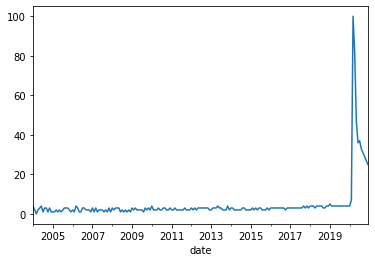

In [28]:
plot_word("wfh")

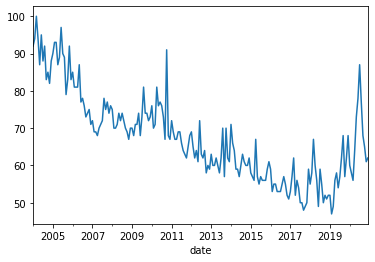

In [24]:
plot_word('karen')

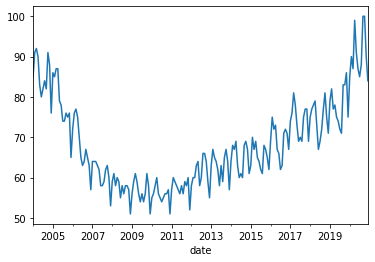

In [25]:
plot_word('based')

In [31]:
savedwords = ["coronavirus", "pandemic", "simp", "quarantine", "pandemic", "furlough", "asymptomatic", "glizzy", "wfh", "epidemic", "bipoc", "pog", "based", "gaslighting", "karen", "wap", "social distance"]
fin_dfs = []

for word in savedwords:
    fin_dfs.append(word_dfs[word])

In [32]:
pd.concat(fin_dfs).to_csv('slang2020_v2.csv')